In [20]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [21]:
with open('sudokuboards.txt', 'r') as f:
    boards = f.read().split('\nGrid ')
boards = [board[3:].split('\n') for board in boards][1:]
boards = [np.array([[int(i) for i in row] for row in board]) for board in boards]


In [22]:
cell_to_block = {((i // 3) % 9, i % 3 + 3 * (i // 27)) : i // 9 for i in range(9 ** 2)}

block_to_cells = {i: [] for i in range(9)}
for k, v in cell_to_block.items():
    block_to_cells[v] += [k]

other_cells_in_block = {k: [[],[]] for k in cell_to_block}  ## todo: possible to make checking faster by 
for cell, block in cell_to_block.items():           # not including previous cells.
    for other_cell in block_to_cells[block]:
        if not cell == other_cell:
            other_cells_in_block[cell][0] += [other_cell[0]]
            other_cells_in_block[cell][1] += [other_cell[1]]
            
for cell, (other_cells_r, other_cells_c) in other_cells_in_block.items():
    other_cells_in_block[cell] = (tuple(other_cells_r), tuple(other_cells_c))

index_board = np.array([[(r, c) for c in range(9)] for r in range(9)])

In [23]:
class Sudoku:
    def __init__(self, initial_board):
        self.state = initial_board
    
        self.row_poss_left = {r: [i for i in range(1, 10) if not i in row] 
                                for r, row in enumerate(initial_board)}
        
        self.col_poss_left = {c: [i for i in range(1, 10) if not i in col] 
                                for c, col in enumerate(initial_board.T)}
        
        self.block_poss_left = {b: [i for i in range(1,10) if not i in initial_board[tuple(zip(*cells))]]
                                for b, cells in block_to_cells.items()}
    
    def isvalid(self):
        for r, row in enumerate(self.state):
            for c, cell_v in enumerate(row):
                if cell_v != 0:
                    if cell_v in self.state[r+1:, c]:
                        return False
                    if cell_v in self.state[r, c+1:]:
                        return False
                    if cell_v in self.state[other_cells_in_block[(r, c)]]:
                        return False

        return True
    
    
    def get_cell_possibilities(self, r, c):

        row_pos = self.row_poss_left[r]
        col_pos = self.col_poss_left[c]
        block_pos = self.block_poss_left[cell_to_block[(r, c)]]
        
        possibilities = list(set(block_pos).intersection(col_pos).intersection(row_pos))
        
        return possibilities
    
    
    def get_cell_solution(self, r, c):
        sol = self.get_cell_possibilities(r, c)
        if len(sol) == 1:
            return sol[0]
        else:
            return False
    
    def make_forced_moves(self):
        did_something = False
        for r, row in enumerate(self.state):
            for c, cell in enumerate(row):
                if cell == 0:
                    
                    val = self.get_cell_solution(r, c)
                    
                    if val:
                        self.state[r, c] = val
                        self.row_poss_left[r].remove(val)
                        self.col_poss_left[c].remove(val)
                        self.block_poss_left[cell_to_block[(r, c)]].remove(val)
                        did_something = True
        
        
        # todo: other stuff.
    
    def make_all_forced_moves(self):
        t1 = time.time()
        while self.make_forced_moves():
            pass
        print(time.time() - t1)
    
    def __repr__(self):
        return ' ' + str(self.state)[1:-1]
                        
                

In [24]:
def solver(board, ls):
    ls[0] += 1
    game = Sudoku(board)
    if not game.isvalid():
        return False
    
    game.make_all_forced_moves()
    
    if not np.any(board == 0):
        return board
    
    for cell_guess in zip(*np.where(board == 0)):
        for val_guess in game.get_cell_possibilities(*cell_guess):
            new_board = np.copy(game.state)
            new_board[cell_guess] = val_guess
            solved = solver(new_board, ls)
            if not solved is False:
                return solved
            
        return False
        
    


0.00015854835510253906
0.00010061264038085938
0.000148773193359375
0.00012540817260742188
5.269050598144531e-05
2.4557113647460938e-05
0.00030803680419921875
0.00013589859008789062
0.0002665519714355469
0.0001366138458251953
0.0001342296600341797
0.00012135505676269531
0.0001163482666015625
0.00015282630920410156
9.942054748535156e-05
7.772445678710938e-05
7.557868957519531e-05
4.076957702636719e-05
0.0001277923583984375
0.00011658668518066406
0.00011372566223144531
0.00010991096496582031
0.0001163482666015625
0.000118255615234375
0.00012731552124023438
0.00011754035949707031
0.00011372566223144531
0.00011706352233886719
0.00011086463928222656
0.0001049041748046875
9.918212890625e-05
0.00010848045349121094
8.749961853027344e-05
0.00010800361633300781
0.0001049041748046875
0.00010776519775390625
9.918212890625e-05
9.34600830078125e-05
8.893013000488281e-05
9.012222290039062e-05
8.797645568847656e-05
0.00010085105895996094
9.107589721679688e-05
9.679794311523438e-05
7.62939453125e-05
0.0

8.916854858398438e-05
4.38690185546875e-05
6.723403930664062e-05
5.817413330078125e-05
5.2928924560546875e-05
6.413459777832031e-05
0.00013303756713867188
0.00017023086547851562
0.00012540817260742188
0.000110626220703125
0.0001876354217529297
0.00026297569274902344
0.0002624988555908203
0.0001842975616455078
0.0003063678741455078
0.00012874603271484375
0.00011038780212402344
0.00011086463928222656
0.00011920928955078125
0.00014090538024902344
0.0004019737243652344
0.00014162063598632812
0.00011348724365234375
0.00010347366333007812
9.512901306152344e-05
0.00011491775512695312
0.00010204315185546875
8.988380432128906e-05
0.00016427040100097656
0.0001323223114013672
0.0001087188720703125
0.00018334388732910156
0.00013303756713867188
0.00011515617370605469
9.274482727050781e-05
0.00016689300537109375
0.00011515617370605469
0.00011563301086425781
0.0001690387725830078
0.00011515617370605469
0.00011301040649414062
0.00011515617370605469
0.0001304149627685547
0.0001239776611328125
0.0001344

0.00011730194091796875
0.000118255615234375
0.00012135505676269531
0.00015664100646972656
0.00011014938354492188
0.00011587142944335938
0.0002818107604980469
0.0003044605255126953
0.00031828880310058594
0.00017309188842773438
0.0001323223114013672
0.000125885009765625
0.00012445449829101562
0.00018405914306640625
0.00027823448181152344
0.00015878677368164062
0.0001289844512939453
0.00012230873107910156
0.00012755393981933594
0.00012683868408203125
0.00021386146545410156
9.465217590332031e-05
0.00011110305786132812
0.00010704994201660156
0.00012683868408203125
0.00011873245239257812
0.00011658668518066406
0.0001201629638671875
0.00012350082397460938
0.0001201629638671875
0.00013017654418945312
0.0001304149627685547
0.00012493133544921875
0.00011324882507324219
0.00011873245239257812
0.00012135505676269531
0.00011944770812988281
0.00012946128845214844
0.00010967254638671875
0.00010609626770019531
0.000125885009765625
0.00010800361633300781
0.00012683868408203125
0.0001323223114013672
0.0

8.988380432128906e-05
8.821487426757812e-05
7.724761962890625e-05
4.410743713378906e-05
6.914138793945312e-05
9.560585021972656e-05
4.863739013671875e-05
8.845329284667969e-05
7.748603820800781e-05
6.079673767089844e-05
4.8160552978515625e-05
7.963180541992188e-05
9.274482727050781e-05
7.653236389160156e-05
4.9591064453125e-05
8.702278137207031e-05
7.963180541992188e-05
9.012222290039062e-05
5.91278076171875e-05
4.673004150390625e-05
8.893013000488281e-05
6.985664367675781e-05
3.910064697265625e-05
9.751319885253906e-05
9.059906005859375e-05
8.392333984375e-05
7.82012939453125e-05
6.222724914550781e-05
5.3882598876953125e-05
7.62939453125e-05
6.365776062011719e-05
5.078315734863281e-05
4.124641418457031e-05
4.1961669921875e-05
8.702278137207031e-05
6.604194641113281e-05
8.988380432128906e-05
7.82012939453125e-05
8.916854858398438e-05
6.031990051269531e-05
3.504753112792969e-05
0.00013327598571777344
9.417533874511719e-05
0.00012254714965820312
9.465217590332031e-05
8.749961853027344e-0

7.2479248046875e-05
5.555152893066406e-05
9.703636169433594e-05
7.414817810058594e-05
5.269050598144531e-05
2.9087066650390625e-05
2.956390380859375e-05
0.0001270771026611328
0.00011706352233886719
0.00010633468627929688
0.00011873245239257812
0.00012755393981933594
0.00011754035949707031
0.00010728836059570312
9.083747863769531e-05
7.534027099609375e-05
7.581710815429688e-05
8.392333984375e-05
5.7697296142578125e-05
8.440017700195312e-05
6.818771362304688e-05
8.249282836914062e-05
5.7697296142578125e-05
7.939338684082031e-05
5.91278076171875e-05
9.632110595703125e-05
6.699562072753906e-05
4.267692565917969e-05
8.440017700195312e-05
8.58306884765625e-05
8.654594421386719e-05
5.888938903808594e-05
4.601478576660156e-05
8.416175842285156e-05
6.008148193359375e-05
4.553794860839844e-05
8.463859558105469e-05
8.225440979003906e-05
8.034706115722656e-05
5.054473876953125e-05
8.106231689453125e-05
4.744529724121094e-05
8.487701416015625e-05
6.937980651855469e-05
7.724761962890625e-05
5.412101

6.413459777832031e-05
7.462501525878906e-05
9.34600830078125e-05
6.079673767089844e-05
5.841255187988281e-05
8.273124694824219e-05
6.198883056640625e-05
8.606910705566406e-05
7.390975952148438e-05
6.937980651855469e-05
6.985664367675781e-05
6.341934204101562e-05
8.153915405273438e-05
0.0001354217529296875
0.00011539459228515625
0.000225067138671875
9.1552734375e-05
5.459785461425781e-05
0.00010323524475097656
6.4849853515625e-05
6.651878356933594e-05
7.963180541992188e-05
9.083747863769531e-05
5.340576171875e-05
6.723403930664062e-05
4.7206878662109375e-05
8.630752563476562e-05
9.1552734375e-05
8.177757263183594e-05
0.000125885009765625
7.367134094238281e-05
7.2479248046875e-05
8.130073547363281e-05
8.368492126464844e-05
7.534027099609375e-05
3.4809112548828125e-05
0.00011992454528808594
7.605552673339844e-05
0.00010275840759277344
9.751319885253906e-05
8.273124694824219e-05
7.081031799316406e-05
8.344650268554688e-05
7.081031799316406e-05
7.05718994140625e-05
7.867813110351562e-05
7.5

0.0001342296600341797
0.00012350082397460938
0.00012302398681640625
0.0001220703125
0.00011849403381347656
0.00014328956604003906
0.00012040138244628906
0.00011324882507324219
0.00011658668518066406
9.775161743164062e-05
0.00010228157043457031
0.0001327991485595703
0.0001380443572998047
0.0001227855682373047
0.00017571449279785156
0.00014162063598632812
0.0002636909484863281
0.0001354217529296875
0.00010466575622558594
9.918212890625e-05
0.00012350082397460938
0.0001785755157470703
0.00011754035949707031
0.00010895729064941406
9.584426879882812e-05
8.940696716308594e-05
9.751319885253906e-05
0.0001266002655029297
0.00010752677917480469
0.00011038780212402344
9.989738464355469e-05
0.00011086463928222656
9.870529174804688e-05
0.00012254714965820312
0.000118255615234375
0.00011754035949707031
0.00011563301086425781
0.00010776519775390625
9.322166442871094e-05
0.00010561943054199219
8.749961853027344e-05
9.655952453613281e-05
9.083747863769531e-05
8.273124694824219e-05
8.249282836914062e-0

9.274482727050781e-05
8.654594421386719e-05
9.059906005859375e-05
4.458427429199219e-05
0.00010228157043457031
7.915496826171875e-05
3.719329833984375e-05
0.0002994537353515625
0.00030541419982910156
0.0002734661102294922
0.00016355514526367188
0.00026535987854003906
0.00012612342834472656
0.00010538101196289062
0.000110626220703125
7.987022399902344e-05
3.5762786865234375e-05
8.678436279296875e-05
4.553794860839844e-05
4.100799560546875e-05
3.9577484130859375e-05
0.0001068115234375
7.796287536621094e-05
5.459785461425781e-05
3.62396240234375e-05
3.814697265625e-05
0.00011396408081054688
0.00010395050048828125
9.465217590332031e-05
8.678436279296875e-05
0.00010657310485839844
0.00022602081298828125
4.935264587402344e-05
3.337860107421875e-05
2.8133392333984375e-05
8.893013000488281e-05
7.319450378417969e-05
0.00010752677917480469
6.103515625e-05
5.0067901611328125e-05
9.679794311523438e-05
8.726119995117188e-05
8.225440979003906e-05
7.009506225585938e-05
2.9802322387695312e-05
0.000124

7.367134094238281e-05
5.793571472167969e-05
3.528594970703125e-05
9.298324584960938e-05
3.838539123535156e-05
0.000152587890625
0.00010800361633300781
0.00010228157043457031
0.00010204315185546875
8.034706115722656e-05
5.245208740234375e-05
7.486343383789062e-05
6.008148193359375e-05
6.222724914550781e-05
0.00012159347534179688
7.772445678710938e-05
5.14984130859375e-05
4.982948303222656e-05
6.008148193359375e-05
3.886222839355469e-05
8.106231689453125e-05
5.054473876953125e-05
4.8160552978515625e-05
3.62396240234375e-05
3.743171691894531e-05
0.00010228157043457031
9.250640869140625e-05
6.747245788574219e-05
5.91278076171875e-05
4.696846008300781e-05
6.532669067382812e-05
6.937980651855469e-05
5.173683166503906e-05
4.029273986816406e-05
3.123283386230469e-05
3.3855438232421875e-05
9.131431579589844e-05
8.225440979003906e-05
5.698204040527344e-05
3.457069396972656e-05
5.555152893066406e-05
3.719329833984375e-05
5.841255187988281e-05
8.0108642578125e-05
5.7220458984375e-05
4.124641418457

0.00010156631469726562
7.200241088867188e-05
4.00543212890625e-05
0.00010418891906738281
0.00010347366333007812
0.00012922286987304688
8.273124694824219e-05
8.344650268554688e-05
5.8650970458984375e-05
5.841255187988281e-05
6.508827209472656e-05
0.00011706352233886719
0.0002422332763671875
0.00017976760864257812
0.00012969970703125
0.000125885009765625
0.00016117095947265625
0.00012350082397460938
0.00015211105346679688
0.00011610984802246094
9.965896606445312e-05
9.942054748535156e-05
9.751319885253906e-05
7.557868957519531e-05
7.724761962890625e-05
9.107589721679688e-05
7.939338684082031e-05
5.030632019042969e-05
0.00011682510375976562
9.751319885253906e-05
9.942054748535156e-05
0.00012612342834472656
7.390975952148438e-05
7.700920104980469e-05
6.628036499023438e-05
6.365776062011719e-05
7.43865966796875e-05
6.29425048828125e-05
4.458427429199219e-05
6.890296936035156e-05
5.841255187988281e-05
4.6253204345703125e-05
8.249282836914062e-05
5.6743621826171875e-05
8.130073547363281e-05
7

7.224082946777344e-05
6.389617919921875e-05
6.437301635742188e-05
7.534027099609375e-05
5.221366882324219e-05
9.775161743164062e-05
8.58306884765625e-05
7.176399230957031e-05
0.00014829635620117188
6.008148193359375e-05
5.125999450683594e-05
6.532669067382812e-05
5.936622619628906e-05
6.747245788574219e-05
7.724761962890625e-05
9.417533874511719e-05
6.914138793945312e-05
5.3882598876953125e-05
0.00012111663818359375
0.00010585784912109375
0.00018072128295898438
9.512901306152344e-05
0.00011372566223144531
9.918212890625e-05
7.891654968261719e-05
5.53131103515625e-05
5.364418029785156e-05
7.104873657226562e-05
8.654594421386719e-05
8.273124694824219e-05
8.058547973632812e-05
7.867813110351562e-05
8.392333984375e-05
8.678436279296875e-05
7.963180541992188e-05
4.506111145019531e-05
7.796287536621094e-05
8.106231689453125e-05
8.606910705566406e-05
6.008148193359375e-05
8.606910705566406e-05
9.131431579589844e-05
7.462501525878906e-05
8.082389831542969e-05
9.584426879882812e-05
6.9618225097

7.557868957519531e-05
7.653236389160156e-05
9.012222290039062e-05
7.62939453125e-05
0.00010323524475097656
7.605552673339844e-05
6.175041198730469e-05
8.749961853027344e-05
5.245208740234375e-05
9.131431579589844e-05
7.414817810058594e-05
4.696846008300781e-05
9.441375732421875e-05
7.176399230957031e-05
7.343292236328125e-05
9.226799011230469e-05
7.772445678710938e-05
9.799003601074219e-05
0.00010132789611816406
7.987022399902344e-05
5.9604644775390625e-05
7.534027099609375e-05
8.20159912109375e-05
8.20159912109375e-05
8.273124694824219e-05
7.033348083496094e-05
0.00014662742614746094
9.72747802734375e-05
7.295608520507812e-05
9.369850158691406e-05
5.7220458984375e-05
0.0002551078796386719
0.0002741813659667969
0.00011658668518066406
8.20159912109375e-05
9.179115295410156e-05
0.0001456737518310547
9.298324584960938e-05
0.0001201629638671875
0.00010919570922851562
0.0001666545867919922
9.512901306152344e-05
9.894371032714844e-05
5.984306335449219e-05
9.608268737792969e-05
9.131431579589

0.00010132789611816406
0.00012087821960449219
0.00014543533325195312
4.9591064453125e-05
8.630752563476562e-05
0.00016880035400390625
6.914138793945312e-05
8.440017700195312e-05
8.96453857421875e-05
6.890296936035156e-05
0.00011014938354492188
7.176399230957031e-05
5.1975250244140625e-05
0.00011324882507324219
0.0002422332763671875
8.20159912109375e-05
4.8160552978515625e-05
0.00011682510375976562
5.221366882324219e-05
3.337860107421875e-05
3.814697265625e-05
9.036064147949219e-05
6.890296936035156e-05
5.3882598876953125e-05
4.863739013671875e-05
5.2928924560546875e-05
4.553794860839844e-05
9.5367431640625e-05
6.008148193359375e-05
3.9577484130859375e-05
4.100799560546875e-05
0.0001010894775390625
9.226799011230469e-05
8.749961853027344e-05
9.131431579589844e-05
5.555152893066406e-05
4.100799560546875e-05
4.00543212890625e-05
7.915496826171875e-05
6.67572021484375e-05
4.124641418457031e-05
3.886222839355469e-05
8.249282836914062e-05
5.1975250244140625e-05
9.489059448242188e-05
8.130073

8.20159912109375e-05
8.320808410644531e-05
0.00011992454528808594
0.0001347064971923828
9.131431579589844e-05
8.678436279296875e-05
5.650520324707031e-05
0.00010752677917480469
0.00011348724365234375
6.771087646484375e-05
9.846687316894531e-05
0.0001266002655029297
0.0001163482666015625
6.866455078125e-05
0.00012135505676269531
0.00015974044799804688
0.00010848045349121094
0.00014925003051757812
5.984306335449219e-05
9.202957153320312e-05
5.245208740234375e-05
9.489059448242188e-05
0.00011515617370605469
0.00012302398681640625
8.130073547363281e-05
0.00015592575073242188
0.00011086463928222656
9.465217590332031e-05
4.410743713378906e-05
0.00012612342834472656
0.00030112266540527344
0.00011110305786132812
8.20159912109375e-05
5.698204040527344e-05
9.465217590332031e-05
0.00010228157043457031
0.00020003318786621094
0.0001780986785888672
9.489059448242188e-05
5.888938903808594e-05
3.933906555175781e-05
5.53131103515625e-05
3.600120544433594e-05
8.58306884765625e-05
3.361701965332031e-05
0

0.00010323524475097656
0.00011134147644042969
0.00010728836059570312
0.00011515617370605469
0.00011348724365234375
0.0001125335693359375
0.00011134147644042969
0.00011277198791503906
0.00010752677917480469
0.0001327991485595703
0.00010776519775390625
0.00010943412780761719
0.0001327991485595703
0.000316619873046875
0.0003008842468261719
0.0002751350402832031
0.00015544891357421875
0.00012230873107910156
0.0001277923583984375
0.00012183189392089844
0.00013375282287597656
0.0001251697540283203
0.00011610984802246094
0.0002071857452392578
0.00013899803161621094
0.00012254714965820312
0.00014328956604003906
0.00011205673217773438
0.00011014938354492188
0.0001246929168701172
6.175041198730469e-05
9.703636169433594e-05
4.410743713378906e-05
0.00010848045349121094
0.00010013580322265625
7.843971252441406e-05
5.936622619628906e-05
5.91278076171875e-05
7.486343383789062e-05
6.771087646484375e-05
6.508827209472656e-05
0.00016236305236816406
0.0001971721649169922
7.271766662597656e-05
5.531311035

0.00013375282287597656
4.982948303222656e-05
0.00017023086547851562
0.0001595020294189453
0.00010418891906738281
0.00015544891357421875
0.0001316070556640625
0.00026798248291015625
0.0001049041748046875
0.0001125335693359375
0.00012946128845214844
8.702278137207031e-05
0.00023746490478515625
0.00024890899658203125
0.00016021728515625
8.082389831542969e-05
7.081031799316406e-05
0.0001068115234375
0.00014519691467285156
7.343292236328125e-05
0.00010752677917480469
0.00012540817260742188
0.00026607513427734375
0.00011754035949707031
0.00011467933654785156
9.846687316894531e-05
0.00011992454528808594
9.965896606445312e-05
0.00010752677917480469
9.965896606445312e-05
8.797645568847656e-05
0.00020551681518554688
8.702278137207031e-05
8.416175842285156e-05
6.937980651855469e-05
0.00015115737915039062
9.751319885253906e-05
6.961822509765625e-05
0.0001766681671142578
9.632110595703125e-05
0.00010657310485839844
9.298324584960938e-05
0.00018739700317382812
0.00012803077697753906
0.00010204315185

0.00017523765563964844
0.00025844573974609375
9.131431579589844e-05
7.009506225585938e-05
0.00020360946655273438
0.0001277923583984375
8.249282836914062e-05
0.00014472007751464844
0.001003265380859375
0.00011849403381347656
5.91278076171875e-05
0.00011682510375976562
0.00012612342834472656
7.557868957519531e-05
0.00010347366333007812
0.0002892017364501953
0.00011730194091796875
0.00010538101196289062
7.748603820800781e-05
9.632110595703125e-05
0.00016069412231445312
7.843971252441406e-05
0.00011301040649414062
0.00016164779663085938
0.00022554397583007812
0.00010704994201660156
5.125999450683594e-05
0.00019669532775878906
9.226799011230469e-05
0.00012087821960449219
7.939338684082031e-05
0.00017380714416503906
8.893013000488281e-05
8.392333984375e-05
9.34600830078125e-05
0.00032138824462890625
0.00014448165893554688
0.00010848045349121094
0.00010609626770019531
0.00015544891357421875
0.00016188621520996094
0.00011420249938964844
8.630752563476562e-05
0.00010418891906738281
9.2029571533

6.413459777832031e-05
9.489059448242188e-05
5.793571472167969e-05
4.315376281738281e-05
0.00010991096496582031
0.00011014938354492188
0.00011372566223144531
8.368492126464844e-05
7.510185241699219e-05
5.7220458984375e-05
0.00011301040649414062
0.00010561943054199219
0.0001983642578125
0.00018930435180664062
0.00029921531677246094
8.606910705566406e-05
5.602836608886719e-05
5.173683166503906e-05
0.00012254714965820312
0.0001308917999267578
8.0108642578125e-05
7.367134094238281e-05
0.00010657310485839844
6.67572021484375e-05
5.435943603515625e-05
4.4345855712890625e-05
4.57763671875e-05
5.507469177246094e-05
4.553794860839844e-05
4.5299530029296875e-05
0.00012040138244628906
0.00011110305786132812
0.00010514259338378906
9.107589721679688e-05
6.937980651855469e-05
7.033348083496094e-05
8.988380432128906e-05
7.128715515136719e-05
8.559226989746094e-05
0.00011539459228515625
8.368492126464844e-05
5.269050598144531e-05
0.00010800361633300781
8.559226989746094e-05
6.532669067382812e-05
0.0001

5.364418029785156e-05
4.38690185546875e-05
4.649162292480469e-05
5.984306335449219e-05
7.295608520507812e-05
5.507469177246094e-05
4.363059997558594e-05
4.4345855712890625e-05
5.793571472167969e-05
0.00010585784912109375
0.00010657310485839844
6.318092346191406e-05
0.0001087188720703125
5.2928924560546875e-05
0.00010657310485839844
0.00010848045349121094
0.000110626220703125
0.00013399124145507812
0.00010609626770019531
0.00010514259338378906
5.793571472167969e-05
5.2928924560546875e-05
0.00011920928955078125
6.198883056640625e-05
5.817413330078125e-05
0.00015091896057128906
9.369850158691406e-05
6.771087646484375e-05
5.984306335449219e-05
6.842613220214844e-05
5.030632019042969e-05
0.00011205673217773438
9.393692016601562e-05
7.152557373046875e-05
9.5367431640625e-05
7.033348083496094e-05
0.00010347366333007812
0.00011324882507324219
7.390975952148438e-05
5.698204040527344e-05
5.5789947509765625e-05
0.00011229515075683594
7.319450378417969e-05
3.933906555175781e-05
0.00011134147644042

7.581710815429688e-05
5.602836608886719e-05
6.29425048828125e-05
3.933906555175781e-05
5.435943603515625e-05
7.843971252441406e-05
5.364418029785156e-05
8.177757263183594e-05
4.649162292480469e-05
6.127357482910156e-05
0.00012350082397460938
8.082389831542969e-05
8.344650268554688e-05
0.0001354217529296875
0.00016951560974121094
5.7697296142578125e-05
0.00010323524475097656
0.00025582313537597656
0.00015425682067871094
0.00011873245239257812
0.00010180473327636719
7.390975952148438e-05
7.557868957519531e-05
0.00010204315185546875
8.869171142578125e-05
7.62939453125e-05
0.00011801719665527344
9.822845458984375e-05
9.012222290039062e-05
0.00012350082397460938
9.965896606445312e-05
6.532669067382812e-05
6.151199340820312e-05
9.417533874511719e-05
6.651878356933594e-05
0.00012922286987304688
0.00012040138244628906
0.00011682510375976562
0.00011444091796875
0.00012159347534179688
0.00011873245239257812
0.00010156631469726562
9.5367431640625e-05
7.62939453125e-05
7.677078247070312e-05
8.1300

0.0002110004425048828
0.0001442432403564453
0.00018167495727539062
0.0003924369812011719
0.0002391338348388672
0.00010442733764648438
4.9114227294921875e-05
8.845329284667969e-05
5.793571472167969e-05
0.0002162456512451172
0.00011968612670898438
0.00013208389282226562
8.225440979003906e-05
9.059906005859375e-05
0.00014019012451171875
7.224082946777344e-05
6.4849853515625e-05
0.00012946128845214844
0.0003733634948730469
0.00014781951904296875
0.00012755393981933594
7.867813110351562e-05
0.00012421607971191406
0.00018215179443359375
0.00013256072998046875
0.0001239776611328125
0.00011539459228515625
0.0002105236053466797
0.00010442733764648438
9.5367431640625e-05
0.0001900196075439453
0.00023245811462402344
7.939338684082031e-05
0.0001201629638671875
0.00011467933654785156
5.602836608886719e-05
0.00012969970703125
0.00027751922607421875
0.0003254413604736328
0.000125885009765625
9.965896606445312e-05
0.0002887248992919922
0.0001990795135498047
8.225440979003906e-05
7.677078247070312e-05


0.0001666545867919922
9.72747802734375e-05
9.131431579589844e-05
0.0001316070556640625
5.555152893066406e-05
5.3882598876953125e-05
0.0002307891845703125
0.00017762184143066406
0.0001819133758544922
9.703636169433594e-05
6.604194641113281e-05
7.581710815429688e-05
7.653236389160156e-05
6.532669067382812e-05
9.012222290039062e-05
8.368492126464844e-05
9.34600830078125e-05
0.00010967254638671875
8.940696716308594e-05
0.00018715858459472656
6.771087646484375e-05
8.177757263183594e-05
6.985664367675781e-05
9.1552734375e-05
0.00014352798461914062
8.511543273925781e-05
0.00011301040649414062
0.0001666545867919922
0.0001347064971923828
0.00013136863708496094
0.00012087821960449219
0.0001308917999267578
6.461143493652344e-05
3.886222839355469e-05
0.00011372566223144531
0.00034689903259277344
0.0002455711364746094
0.0003190040588378906
0.0002429485321044922
0.0001614093780517578
6.556510925292969e-05
7.867813110351562e-05
0.00015926361083984375
0.0002434253692626953
0.00011992454528808594
0.000

0.00012087821960449219
9.846687316894531e-05
9.369850158691406e-05
0.00013947486877441406
0.00011539459228515625
6.389617919921875e-05
9.107589721679688e-05
8.058547973632812e-05
8.344650268554688e-05
0.00017690658569335938
0.00015544891357421875
6.413459777832031e-05
7.939338684082031e-05
4.1961669921875e-05
0.00017762184143066406
6.341934204101562e-05
0.0001308917999267578
0.00013065338134765625
7.414817810058594e-05
0.0001468658447265625
7.963180541992188e-05
7.772445678710938e-05
0.00013303756713867188
0.00012493133544921875
0.00011706352233886719
0.00010800361633300781
0.0001304149627685547
0.00013136863708496094
0.00012040138244628906
0.00020170211791992188
0.00012683868408203125
0.00010776519775390625
0.00014257431030273438
6.914138793945312e-05
6.771087646484375e-05
0.00011277198791503906
6.937980651855469e-05
5.435943603515625e-05
7.295608520507812e-05
0.00011801719665527344
0.0001285076141357422
0.00011563301086425781
0.0001404285430908203
0.00011110305786132812
6.50882720947

2.2172927856445312e-05
0.0001323223114013672
0.00011730194091796875
6.699562072753906e-05
0.00011515617370605469
6.723403930664062e-05
3.218650817871094e-05
3.361701965332031e-05
0.00019216537475585938
0.00011682510375976562
0.00012302398681640625
0.00010561943054199219
0.00011229515075683594
0.000118255615234375
0.00011491775512695312
6.532669067382812e-05
0.00012540817260742188
6.437301635742188e-05
0.0002818107604980469
0.0002942085266113281
0.00013184547424316406
5.745887756347656e-05
0.00011754035949707031
0.0001373291015625
8.869171142578125e-05
7.152557373046875e-05
0.00012230873107910156
0.00010657310485839844
5.936622619628906e-05
0.0002658367156982422
0.000156402587890625
0.00011229515075683594
0.00010156631469726562
8.96453857421875e-05
9.226799011230469e-05
5.650520324707031e-05
4.839897155761719e-05
9.560585021972656e-05
7.62939453125e-05
3.6716461181640625e-05
3.886222839355469e-05
0.00012874603271484375
0.00012230873107910156
8.273124694824219e-05
7.939338684082031e-05
5

0.00011849403381347656
0.00011110305786132812
0.00010561943054199219
0.00012159347534179688
0.00011181831359863281
0.00010371208190917969
0.0001201629638671875
0.00012826919555664062
0.0001468658447265625
0.0001201629638671875
0.00011181831359863281
0.00012564659118652344
0.0002090930938720703
0.00013566017150878906
0.00011444091796875
0.00010657310485839844
0.00022864341735839844
0.00011897087097167969
0.00010371208190917969
0.00011682510375976562
0.00013875961303710938
8.606910705566406e-05
0.0003612041473388672
0.00013756752014160156
0.0001277923583984375
0.00011944770812988281
0.00010561943054199219
0.00018405914306640625
0.00018596649169921875
0.0001583099365234375
0.00011301040649414062
0.0001735687255859375
0.00022149085998535156
0.00014638900756835938
0.00014925003051757812
0.00014019012451171875
0.00024437904357910156
0.00014972686767578125
0.00012803077697753906
9.250640869140625e-05
0.00010395050048828125
7.390975952148438e-05
3.0517578125e-05
3.528594970703125e-05
4.3392181

0.00018453598022460938
8.440017700195312e-05
5.459785461425781e-05
0.00017833709716796875
0.0003154277801513672
0.00013399124145507812
0.00027942657470703125
0.00011563301086425781
7.390975952148438e-05
0.00010848045349121094
0.0001347064971923828
0.00016021728515625
0.00019097328186035156
0.00014591217041015625
0.0001518726348876953
0.0001430511474609375
0.00017976760864257812
0.0001621246337890625
0.00011587142944335938
0.00010442733764648438
0.00011467933654785156
0.00026535987854003906
0.00017309188842773438
0.00011110305786132812
0.00010704994201660156
0.00011563301086425781
0.00019478797912597656
0.00010442733764648438
8.225440979003906e-05
0.00019288063049316406
0.00010991096496582031
4.696846008300781e-05
9.584426879882812e-05
0.00014901161193847656
9.5367431640625e-05
7.43865966796875e-05
5.340576171875e-05
0.0001456737518310547
0.00022649765014648438
0.00010371208190917969
9.393692016601562e-05
0.0001823902130126953
0.00013136863708496094
5.078315734863281e-05
4.1723251342773

4.649162292480469e-05
4.7206878662109375e-05
0.00016808509826660156
0.0001437664031982422
0.00016546249389648438
0.00014066696166992188
0.0001239776611328125
7.390975952148438e-05
8.678436279296875e-05
5.888938903808594e-05
5.054473876953125e-05
8.606910705566406e-05
6.079673767089844e-05
7.2479248046875e-05
8.153915405273438e-05
6.079673767089844e-05
5.626678466796875e-05
3.695487976074219e-05
3.647804260253906e-05
0.0001068115234375
8.797645568847656e-05
0.00012731552124023438
0.0001270771026611328
0.00011420249938964844
0.00012540817260742188
0.000125885009765625
0.00011801719665527344
8.392333984375e-05
8.845329284667969e-05
7.700920104980469e-05
7.176399230957031e-05
7.271766662597656e-05
0.0001163482666015625
0.0001347064971923828
0.00016760826110839844
9.608268737792969e-05
8.106231689453125e-05
8.869171142578125e-05
0.00010824203491210938
9.942054748535156e-05
8.749961853027344e-05
0.0001266002655029297
8.7738037109375e-05
8.845329284667969e-05
9.369850158691406e-05
0.000128030

0.00033092498779296875
0.00010204315185546875
0.0001289844512939453
0.0001270771026611328
0.00012946128845214844
0.00014662742614746094
0.0002262592315673828
0.0001666545867919922
0.00010156631469726562
0.0001614093780517578
0.00010609626770019531
0.00011277198791503906
0.00019979476928710938
0.0002522468566894531
9.560585021972656e-05
0.00010347366333007812
0.0001895427703857422
0.0002422332763671875
0.00010442733764648438
0.0001239776611328125
0.00010991096496582031
8.344650268554688e-05
0.0002803802490234375
0.00015282630920410156
9.965896606445312e-05
9.608268737792969e-05
9.012222290039062e-05
7.224082946777344e-05
0.00013947486877441406
0.00010991096496582031
9.34600830078125e-05
9.846687316894531e-05
0.00012421607971191406
8.702278137207031e-05
0.0001010894775390625
0.00012540817260742188
0.00025391578674316406
0.00013899803161621094
8.96453857421875e-05
6.961822509765625e-05
0.0001888275146484375
8.20159912109375e-05
0.00011515617370605469
0.00013017654418945312
0.0001840591430

0.0001811981201171875
0.00015044212341308594
8.320808410644531e-05
8.606910705566406e-05
0.00014829635620117188
0.00010204315185546875
0.00017714500427246094
0.00021982192993164062
6.4849853515625e-05
0.0002231597900390625
7.510185241699219e-05
0.0001227855682373047
9.846687316894531e-05
0.0001289844512939453
0.0001277923583984375
0.0001811981201171875
8.249282836914062e-05
0.00010442733764648438
0.00014019012451171875
9.870529174804688e-05
0.00021219253540039062
0.00011467933654785156
9.72747802734375e-05
8.344650268554688e-05
0.00013494491577148438
4.9114227294921875e-05
4.100799560546875e-05
0.00010037422180175781
8.153915405273438e-05
4.9591064453125e-05
0.0001010894775390625
0.00023984909057617188
0.000164031982421875
0.0001697540283203125
0.00014400482177734375
0.00011181831359863281
0.0001361370086669922
0.0002105236053466797
0.00012540817260742188
0.00012111663818359375
0.0002582073211669922
0.00012111663818359375
0.00011682510375976562
0.00017690658569335938
0.0002033710479736

9.298324584960938e-05
8.869171142578125e-05
0.0002002716064453125
0.00018334388732910156
8.058547973632812e-05
3.933906555175781e-05
7.200241088867188e-05
5.6743621826171875e-05
4.5299530029296875e-05
7.486343383789062e-05
7.414817810058594e-05
6.270408630371094e-05
6.270408630371094e-05
3.1948089599609375e-05
7.43865966796875e-05
6.914138793945312e-05
8.392333984375e-05
0.0002453327178955078
0.0002205371856689453
0.0002033710479736328
0.00020051002502441406
0.00010538101196289062
0.00010776519775390625
0.00010371208190917969
9.918212890625e-05
0.0001277923583984375
0.0001068115234375
8.940696716308594e-05
7.939338684082031e-05
8.296966552734375e-05
7.081031799316406e-05
5.245208740234375e-05
3.695487976074219e-05
8.893013000488281e-05
6.747245788574219e-05
4.553794860839844e-05
4.267692565917969e-05
8.726119995117188e-05
6.389617919921875e-05
4.291534423828125e-05
2.7179718017578125e-05
0.0001125335693359375
9.512901306152344e-05
9.465217590332031e-05
9.250640869140625e-05
8.869171142

5.602836608886719e-05
4.863739013671875e-05
4.076957702636719e-05
9.202957153320312e-05
8.916854858398438e-05
8.392333984375e-05
0.0001010894775390625
7.939338684082031e-05
9.489059448242188e-05
9.703636169433594e-05
8.678436279296875e-05
8.654594421386719e-05
8.225440979003906e-05
4.5299530029296875e-05
9.822845458984375e-05
0.00012803077697753906
8.0108642578125e-05
0.0001857280731201172
0.00010728836059570312
8.869171142578125e-05
9.179115295410156e-05
8.416175842285156e-05
8.106231689453125e-05
8.916854858398438e-05
7.319450378417969e-05
5.459785461425781e-05
4.124641418457031e-05
5.2928924560546875e-05
4.100799560546875e-05
0.00010061264038085938
8.845329284667969e-05
7.987022399902344e-05
7.677078247070312e-05
9.465217590332031e-05
9.608268737792969e-05
5.626678466796875e-05
4.982948303222656e-05
4.696846008300781e-05
5.984306335449219e-05
9.465217590332031e-05
6.794929504394531e-05
4.1484832763671875e-05
4.172325134277344e-05
6.103515625e-05
0.00010347366333007812
0.000105619430

8.940696716308594e-05
8.511543273925781e-05
6.508827209472656e-05
8.440017700195312e-05
6.103515625e-05
8.130073547363281e-05
7.200241088867188e-05
7.653236389160156e-05
5.412101745605469e-05
3.2901763916015625e-05
9.059906005859375e-05
9.202957153320312e-05
8.96453857421875e-05
8.654594421386719e-05
7.271766662597656e-05
6.961822509765625e-05
9.775161743164062e-05
6.580352783203125e-05
0.00015234947204589844
0.00013780593872070312
0.00011944770812988281
0.000270843505859375
0.0002384185791015625
0.0002231597900390625
0.00010466575622558594
0.0001049041748046875
0.00018286705017089844
0.00011491775512695312
9.489059448242188e-05
8.726119995117188e-05
9.1552734375e-05
9.965896606445312e-05
9.012222290039062e-05
0.00010895729064941406
8.082389831542969e-05
9.34600830078125e-05
6.842613220214844e-05
0.00010156631469726562
0.00010538101196289062
0.00011467933654785156
8.273124694824219e-05
8.96453857421875e-05
8.20159912109375e-05
8.153915405273438e-05
7.867813110351562e-05
7.0095062255859

7.987022399902344e-05
7.462501525878906e-05
5.507469177246094e-05
0.0001068115234375
8.106231689453125e-05
8.726119995117188e-05
4.935264587402344e-05
0.0001220703125
0.00010466575622558594
6.985664367675781e-05
5.14984130859375e-05
5.6743621826171875e-05
0.00018787384033203125
0.000148773193359375
9.34600830078125e-05
0.00010275840759277344
7.104873657226562e-05
0.00015878677368164062
5.602836608886719e-05
7.009506225585938e-05
4.792213439941406e-05
7.033348083496094e-05
9.512901306152344e-05
6.794929504394531e-05
5.221366882324219e-05
5.4836273193359375e-05
6.985664367675781e-05
4.9591064453125e-05
4.9114227294921875e-05
0.00012731552124023438
0.00011801719665527344
0.00010347366333007812
8.177757263183594e-05
7.128715515136719e-05
4.696846008300781e-05
3.6716461181640625e-05
3.695487976074219e-05
4.982948303222656e-05
7.462501525878906e-05
5.650520324707031e-05
0.00010514259338378906
9.775161743164062e-05
5.125999450683594e-05
9.751319885253906e-05
6.747245788574219e-05
9.1791152954

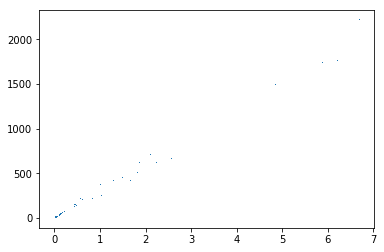

In [26]:
t1 = time.time()
tims = []
calls = []

for i, board in enumerate(boards):
    
    ls = [0]
    t = time.time()
    sol = solver(board, ls)
    dt = time.time() - t
    tims += [dt]
    calls += ls
    

plt.plot(tims, calls, ',')

In [29]:
ls = [[1,2], [3,4,5], [6,7]]

In [35]:
sum([float(i) for i in st.split('\n')])

1.437373399734497